In [6]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft
import ipympl

import seaborn as sns

In [2]:
DATA_FOLDER = "20210624_TipOpticalAlignment_FR03-2R3"
DATA_FOLDERPATH = sio.get_qudiamond_folderpath(DATA_FOLDER)
FIGURE_FOLDERPATH = sio.get_figure_folderpath(DATA_FOLDER)

src.io :: INFO :: qudiamond folderpath is \\kernix\qudiamond\Data\20210624_TipOpticalAlignment_FR03-2R3\


# Spectrometer

In [ ]:
SPECTROMETER_SUBFOLDER = "SpectrometerData_FR03-2R3"
SPECTROMETER_SUBFOLDERPATH = sio.get_qudiamond_folderpath(os.path.join(DATA_FOLDER, SPECTROMETER_SUBFOLDER))

In [ ]:
data_files = {
        "Background": "80mW_background_Subt20_15-55-26-988",
        "Center bright spot": "80mW_center_Subt20_15-56-20-988",
        "Lower right bright spot":"80mW_lower_right_Subt20_15-55-56-988",
        "NV": "80mW_Subt20_15-52-08-988"
}

In [ ]:
fig, ax = plt.subplots()

data = sio.read_spectrometer_data(data_files["Background"], folder=SPECTROMETER_SUBFOLDERPATH)
ax.plot(data.wavelength, data.intensity)


data = sio.read_spectrometer_data(data_files["NV"], folder=SPECTROMETER_SUBFOLDERPATH)
ax.plot(data.wavelength, data.intensity)


ax.set_xlim([500, 1000])
ax.set_ylim([-10, 60])
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
sio.save_figures("NV_vs_background", folder=os.path.join(FIGURE_FOLDERPATH, SPECTROMETER_SUBFOLDER))

In [ ]:
%matplotlib widget
for key, filename in data_files.items():
    data = sio.read_spectrometer_data(filename, folder=SPECTROMETER_SUBFOLDERPATH)
    fig, ax = plt.subplots()
    ax.set_xlim([500, 1000])
    ax.set_ylim([-10, 60])
    ax.plot(data.wavelength, data.intensity)
    ax.set_title(key)
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Intensity (a.u.)")
    sio.save_figures(filename, folder=os.path.join(FIGURE_FOLDERPATH, SPECTROMETER_SUBFOLDER))

In [ ]:
%matplotlib widget

fig, ax = plt.subplots()

for key, filename in data_files.items():
    data = sio.read_spectrometer_data(filename, folder=SPECTROMETER_SUBFOLDERPATH)
    ax.plot(data.wavelength, data.intensity, label=key, linewidth=0.7)
FIGURE_FOLDERPATH
ax.set_xlim([500, 1000])
ax.set_ylim([-10, 60])
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
ax.legend()
sio.save_figures("composite_figure", folder=os.path.join(FIGURE_FOLDERPATH, SPECTROMETER_SUBFOLDER))

# Confocal

In [ ]:
basepath = os.path.join("\\\\kernix", "qudiamond", "QudiHiraData")
path = os.path.join(basepath, os.path.join(DATA_FOLDER, CONFOCAL_SUBFOLDER))
        
print(path

In [3]:
CONFOCAL_SUBFOLDER = r"2021\07\20210705\Confocal"
CONFOCAL_SUBFOLDERPATH = sio.get_qudi_data_path(os.path.join(DATA_FOLDER, CONFOCAL_SUBFOLDER))

In [4]:
fname = "20210705-0955-34_confocal_xy_image_1.dat"

params = sio.read_qudi_parameters(fname, CONFOCAL_SUBFOLDERPATH)
data = np.genfromtxt(CONFOCAL_SUBFOLDERPATH + fname, dtype=None, delimiter='\t')

src.io :: INFO :: Saving '20210705-0955-34_confocal_xy_image_1' to 'C:/Nextcloud\Data_Analysis\20210624_TipOpticalAlignment_FR03-2R3\2021\07\20210705\Confocal'


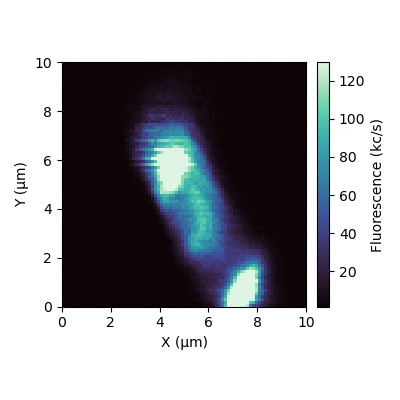

In [15]:
%matplotlib widget
extent = np.array([0, params['X image max (m)'], 0, params['Y image max']]) * 1e3

fig, ax = plt.subplots(figsize=(4, 4))
img = ax.imshow(data/1e3, cmap=sns.color_palette("mako", as_cmap=True), origin="lower", vmin=1, vmax=130, extent=extent)
cbar = fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Fluorescence (kc/s)")
ax.set_xlabel("X (μm)")
ax.set_ylabel("Y (μm)")
fig.tight_layout()
sio.save_figures(fname, folder=os.path.join(FIGURE_FOLDERPATH, CONFOCAL_SUBFOLDER))

# Autocorrelation

In [16]:
AUTOCORR_FOLDER = r"2021\07\20210705\Autocorrelation"
AUTOCORR_FOLDERPATH = sio.get_qudi_data_path(os.path.join(DATA_FOLDER, AUTOCORR_FOLDER))

In [17]:
fname = "20210705-1118-41_bright_spot_800k_autocorrelation.dat"

params = sio.read_qudi_parameters(fname, AUTOCORR_FOLDERPATH)
data = np.genfromtxt(AUTOCORR_FOLDERPATH + fname, dtype=None, delimiter='\t')
#fit = sft.autocorrelation_fit(data[:, 0]/1e3, data[:, 1])
#print(f"g2(0) = {fit['g2_0']}")

In [18]:
fname2 = "20210705-1130-26_background_autocorrelation.dat"

params2 = sio.read_qudi_parameters(fname, AUTOCORR_FOLDERPATH)
data2 = np.genfromtxt(AUTOCORR_FOLDERPATH + fname2, dtype=None, delimiter='\t')
#fit = sft.autocorrelation_fit(data[:, 0]/1e3, data[:, 1])
#print(f"g2(0) = {fit['g2_0']}")

Text(0, 0.5, 'Counts')

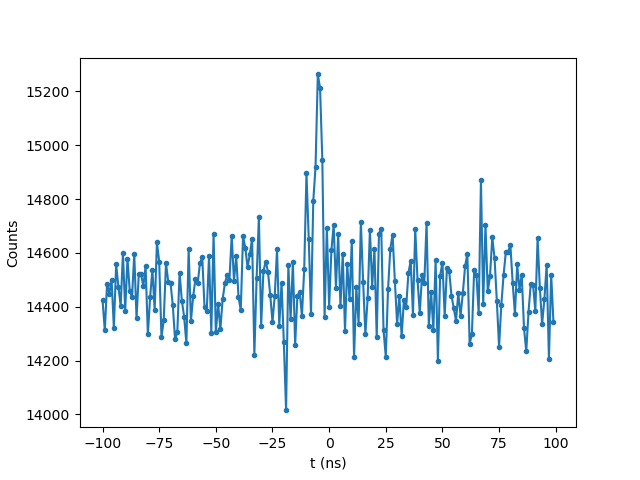

In [21]:
fig, ax = plt.subplots()

ax.plot(data[:, 0]/1e3, data[:, 1], ".-")
#ax.plot(data2[:, 0]/1e3, data2[:, 1], ".-")

#ax.plot(fit["x"], fit["fit"], ".-")
#ax.set_xlim((-100, 100))
ax.set_xlabel("t (ns)")
ax.set_ylabel("Counts")